In [23]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

BNN_PATH = f"../models/bnn_e01_snr{{}}_{{}}.json"
DNN_ELU_PATH = f"../models/ivim_e05_SNR{{}}_{{}}.json"
DNN_RELU_PATH = f"../models/ivimnet_e07_SNR{{}}_{{}}.json"

SNR = [5, 15, 20, 30, 50]

bnn_loss = defaultdict(list)
de_loss = defaultdict(list)
dr_loss = defaultdict(list)

data = []

for i in range(5):
    for snr in SNR:
        with open(BNN_PATH.format(snr, i), "r") as fd:
            bnn = json.load(fd)
        with open(DNN_ELU_PATH.format(snr, i), "r") as fd:
            de = json.load(fd)
        with open(DNN_RELU_PATH.format(snr, i), "r") as fd:
            dr = json.load(fd)

        data.extend([
            {"kind": "bnn", "snr": snr, "i": i, "final_val_loss": bnn["final_val_loss"], "training_time": bnn["training_time"]},
            {"kind": "elu", "snr": snr, "i": i, "final_val_loss": de["final_val_loss"], "training_time": de["training_time"]},
            {"kind": "relu", "snr": snr, "i": i, "final_val_loss": dr["final_val_loss"], "training_time": dr["training_time"]}
        ])

data = pd.DataFrame(data)

In [17]:
data, len(data)

(    kind  snr  i  final_val_loss  training_time
 0    bnn    5  0        0.034078    3580.106016
 1    elu    5  0        0.024997     818.644397
 2   relu    5  0        0.043636    2098.196040
 3    bnn   15  0        0.003132    2460.822814
 4    elu   15  0        0.003261    1274.311632
 ..   ...  ... ..             ...            ...
 70   elu   30  4        0.000952     915.979472
 71  relu   30  4        0.000897    1170.568349
 72   bnn   50  4        0.000350    1689.094024
 73   elu   50  4        0.000536     815.675672
 74  relu   50  4        0.000394    1000.932534
 
 [75 rows x 5 columns],
 75)

In [18]:
data[data.snr == 5]

,kind,snr,i,final_val_loss,training_time
0,bnn,5,0,0.034078,3580.106016
1,elu,5,0,0.024997,818.644397
2,relu,5,0,0.043636,2098.196040
15,bnn,5,1,0.034157,3550.523237
16,elu,5,1,0.024930,1398.252016
17,relu,5,1,0.043844,954.388035
30,bnn,5,2,0.034133,3622.853151
31,elu,5,2,0.024768,1517.124692
32,relu,5,2,0.024972,1551.054057
45,bnn,5,3,0.034020,4187.458349


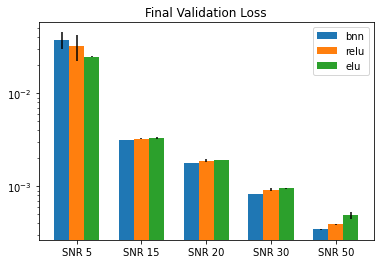

In [87]:
handles = [0, 0, 0]
width = 0.7
x = np.arange(5)
cls = "final_val_loss"

plt.figure(figsize=(6, 4))

for i, kind in enumerate("bnn relu elu".split()):
    slc = data[data.kind == kind]
    gb = slc.groupby(by="snr")
    means, stds = gb.mean(), gb.std()
    plt.bar(x + (i-1)*width/3, means[cls].to_numpy(), width/3, yerr=stds[cls].to_numpy(), label=kind)

plt.xticks(np.arange(5), [f"SNR {snr}" for snr in [5, 15, 20, 30, 50]])
plt.yscale("log")
plt.title("Final Validation Loss")
plt.legend(loc=0)
plt.show()

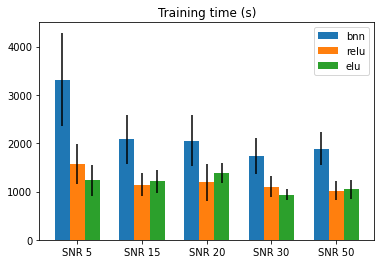

In [86]:
handles = [0, 0, 0]
width = 0.7
x = np.arange(5)
cls = "training_time"

plt.figure(figsize=(6, 4))

for i, kind in enumerate("bnn relu elu".split()):
    slc = data[data.kind == kind]
    gb = slc.groupby(by="snr")
    means, stds = gb.mean(), gb.std()
    plt.bar(x + (i-1)*width/3, means[cls].to_numpy(), width/3, yerr=stds[cls].to_numpy(), label=kind)

plt.xticks(np.arange(5), [f"SNR {snr}" for snr in [5, 15, 20, 30, 50]])
plt.title("Training time (s)")
plt.legend(loc=0)
plt.show()